<a href="https://colab.research.google.com/github/Salvadorglezf/Classic-deep-learning-exercises/blob/main/Multilayer_perceptronTF1_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 1 Red neuronal Perceptrón multicapa  en Tensorflow 1

#Gonzalez Flores Jesus Salvador

En esta tarea se realizó un clasificador de prendas de ropa usando el dataset MNIST Fashion el cual consiste en un conjunto de entrenamiento de 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba a blanco y negro de 28X28 en 10 categorías diferentes. Se implemento y ajusto una red neuronal perceptrón multicapa en Tensorflow 1 con una precisión del 81%.





Para la implementación del modelo se usó Tensorflow que es una plataforma de código abierto de machine learning, el cual contiene implementaciones de distintas funciones de costo, optimizadores, funciones de transferencia y distintas herramientas que nos facilitaran la implementación de una arquitectura de aprendizaje profunda, con la facilidad que podremos enfocarnos más en el diseño del algoritmo.


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.



Se uso además la librería de numpy, matplotlib 
para el uso de funciones que nos faciliten el procesado de datos como shuffle, reshape  y graficar los datos.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lectura del conjunto de datos 

In [3]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()

## Separando el conjunto de datos en Entrenamiento y prueba 

Se inicia acondicionado los datos, y se visualiza como están distribuidos.

In [4]:
(x_train, y_train), (x_test, y_test)=fashion_mnist

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
imagendemo=np.reshape(x_train[24,:],(28,28))

In [7]:
train_labels=tf.keras.utils.to_categorical(y_train)

In [8]:
print(type(train_labels))

<class 'numpy.ndarray'>


In [9]:
x_train.shape[0]

60000

Analizando el conjunto de Fashion_mnist

In [10]:
imagendemo=x_train[5]

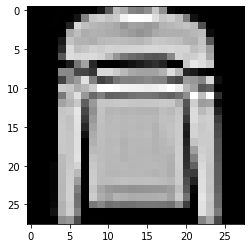

In [11]:
plt.imshow(imagendemo,cmap='gray')

Las etiquetas numéricas pueden ser transformadas al nombre de la clase correspondiente usando el siguiente diccionario 

In [12]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [13]:
label_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [14]:
#Corresponding label
label_dict[y_train[0]]

'Ankle boot'

In [15]:
#Podemos ver la imagen con sus valores de intensidad de gris
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [16]:
image_matrix(imagendemo)

   0   0   0   0 255   0   0   0   0561022440479404386033660318753595550745364652295   0   0   0 255   0   0   0   0   0
   0   0   0 255   0   0510033405507455253049980515106171065025650256375056610502355253047940321304335   0   0   0   0   0   0
   0   0   0 255   089255457048705466654539044625428403825041310405453876040290456454666548195497254717520910   0   0   0   0   0
   0   0   0   0   04335048450438604513544880436054309541310395253774039270430954437044625446254513546665479403060   0   0   0   0
   0   0   0   0637549470459004539044370469204768548195476854692046155481955100050235492154845045390446254947022950   0   0   0   0
   0   0   0   01071055590487055023553040520205380553295535505406053805545705482554315545705380553805487055100040290   0   0   0   0
   0   0   0   02244056355548255533555845538054717538250300902728525245224402116522950344255406051765527855584543095   0   0   0   0
   0   0   0   0   06885300904131010200   0   0   02550484571409945119859180   0   0517655865

# Suerte!!!

# Función para generar batch

Se escribió una función que separa en lotes los datos de entrenamiento con sus respectivas etiquetas y aplica un shuffle antes de devolverlos.

In [17]:
import numpy as np

def next_batch(iter, data, labels,index):

    data_shuffle = data[iter:index]
    labels_shuffle = labels[iter:index]
  

    #perm = np.arange(len(data_shuffle))
    #np.random.shuffle(perm)
  
  
    #data_shuffle = data_shuffle[perm]
    #labels_shuffle = labels_shuffle[perm]
    

    return data_shuffle, labels_shuffle




In [18]:
import sys
np.set_printoptions(threshold=sys.maxsize)

# **Declarando la arquitectura**


Se modifico el número de capas y de neuronas en cada capa, dado que en la experimentación del modelo se observó que si la red es profunda el error es muy alto y decrece muy lento. Si la red posee pocas capas y muchos nodos en la capa de codificación y salida la precisión no supera el 9%. Así que se decidió contar con una arquitectura pequeña.

Se uso como función de activación la función Relu, no fue necesario probar con otra función.

Se uso como función de costo la entropía Softmax cruzada toma como parámetros las probabilidades sin normalizar que devuelve la red neuronal y las etiquetas verdaderas, esto indica la diferencia entre la estimación de distribución de probabilidades de la red y la distribución de probabilidades verdadera.

A esta función de costo se le aplica la función reduce_mean, el cual calcula el promedio de los elementos del vector.

Para el optimizador se usó Adaptive Moment Estimation (ADAM) con un tamaño de paso de 0.001, el cual se observó en este modelo que sí se modificaba el tamaño de paso la precisión avanzaba muy lento con respecto del número de épocas, así que se decidió mantener el tamaño de paso fijo.


Generando función

In [19]:
#Aquí sí declaramos la arquitectura nosotros, no como en SKLearn donde sólo la mandamos a llamar
def Neural_network_model(
    n_nodes_hl1=200,
    n_nodes_hl2=500,
    n_nodes_hl3=600,
    n_nodes_hl4=200,
    n_classes=10
    ):
    # Declarando las entradas y salidas
    x=tf.placeholder('float',[None,784]) 
    #El placeholder es como una especie de memoria reservada que hacemos para la entrada
    #Este placeholder sí tiene un tipo de dato estricto, más como en Java o C, no es tan flexible como Python simple
    #Le ponemos un None porque no sabemos cuantas entradas habrá en cada paso de la red, recordemos que no pasa dato por dato, 
    #sólo que cada entrada es del tamaño de la imagen, de 784. 
    
    
    y=tf.placeholder('float')
    
    # Declarando las variables 
    #Nuestra primera capa oculta se ajusta al tamaño del vector de entrada
    #Notese que cada capa se define en un diccionario (esto es opcional) de tf.Variable, con sus pesos y sus bias
    #el tf.Variable es una variable que podrá modificarse en momento de ejecución
    #se inicializa en algún valor aleatorio, en este caso se usa un aleatorio en una distribución normal
    #Hemos dispuesto la arquitectura con las variables n_nodes_hlx de modo que se ajusa el tamaño de las
    #capas ocultas con las entradas o parámetros de la función "Neural_network_model"
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    hidden_4_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl4]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl4, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    #Si tenemos capas ya entrenadas podemos definirla como una tf.Constant, no variable, porque ya no queremos que esas capas se 
    #modifiquen

    # Declarando la arquitectura
    
    #Aquí dejamos de forma explicita las operaciones de la propagación hacia adelante
    l1 = tf.add(tf.matmul(x,hidden_1_layer['weights']), hidden_1_layer['biases'])
    #Ya que se hizo la operación, aplicamos la función de activación/Transferencia, en este caso es la función "relu"
    #Mas adelante hablaremos de las diferents funciones de activación...
    l1 = tf.nn.relu(l1)

    #Usamos las funciones tf.add y tf.matmul porque ya estan optimizadas
    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)

    #Pero podemos utilizar los operadores nativos de python
    output = tf.matmul(l4,output_layer['weights']) + output_layer['biases']
    
    # Declarando la funcion de costo y optimizador
    #Aquí estamos escogiendo la función de costo o error. 
    #Estas funciones deben elegirse de acuerdo al tipo de problema que queremos resolver
    #para este caso, usamos la entropía cruzada
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                   , labels=y) )
    #También, elegimos el optimizador a utilizar, en este caso se usará uno de los más comunes, 
    #el AdamOptimizer,
    #también, a lo largo del curso revisaremos los optimizadores disponibles 
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    #Esta función nos va regresar un diccionario, en este diccionario estamos 
    #recuperando toda la información importante de la red,
    #las entradas, etiquetas  o targets, salidas, la salida de la función de costo 
    #y el resultado del gradiente u optimizador     
    return dict(
              x=x,
              y=y,
              output=output,
              cost=cost,
              optimizer=optimizer
              )

In [20]:
#Prueba del modelo
#Aqui estamos verificando que todo quedo bien declarado
Neural_network_model()
#Esta función solo sirve para declarar nuestra arquitectura

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



{'cost': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'optimizer': <tf.Operation 'Adam' type=NoOp>,
 'output': <tf.Tensor 'add_4:0' shape=(?, 10) dtype=float32>,
 'x': <tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 'y': <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>}

## función de entrenamiento  y prueba

En la función que se encarga de entrenar el modelo, se determinó un numero de épocas de 10 muestras y tamaño de lotes de 1000 muestras, esto debido a la relación observada entre el tamaño de lotes y la precisión.

In [21]:
def train_neural_network(DNN, hm_epochs=10,batch_size=1000):
#Esta función recibe el modelo a entrenar, el número de épocas y 
#el número de datos a propagar en cada paso

#Para ejecutar las modelos, en TF1 es necesario indicar en el codigo que se mandaŕa a compilador el código
#Por eso, se necesita abrir una session de tensorflow
#Python en interpretado, por eso, para mandarlo a CUDA es necesario indicar qué porción sera compilada
#Todo lo que queda dentro del tf.Session, se manda a compilador
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        index=0
        #Hacemos el ciclo por número de epocas
        print("--- Etapa de entrenamiento ---")
        for epoch in range(hm_epochs):
            epoch_loss = 0
            #Hacemos el ciclo por  número de lotes (batches)
            index=int(x_train.shape[0]/batch_size)
            k=0
            for _ in range(batch_size):
                #Cargamos en epoch_x y epoch_y nuestros datos y sus etiquetas
                epoch_x, epoch_y = next_batch(k, x_train,train_labels,index)#mnist.train.next_batch(batch_size)
                
                try:
                  epo=np.reshape(epoch_x,(60,784))
                  index=index+int(x_train.shape[0]/batch_size)
                  k=k+int(x_train.shape[0]/batch_size)
                  
                except ValueError:
                  epo=np.reshape(epoch_x,(0,784))
                #print(k,index,epo.shape) 
                #index=index+int(x_train.shape[0]/batch_size)
                #k=k+int(x_train.shape[0]/batch_size)
                #Le indicamos a la red que formaran parte de su diccionario, 
                #Estos datos los cargamos en los placeholders que declaramos en el modelo
                feed_dict={DNN["x"]: epo, 
                           DNN["y"]: epoch_y}
                #En el sess.run, estamos ejecutando las funciones u operaciones 
                #que definimos, en este caso son el optimizador y el costo
                #también se le dice que necesitará de la salida de la red y las etiquetas de los datos
                #además, le damos el diccionario de entrada que declaramos en la linea anterior
                #En esta linea se hace el paso de entrenamieno: se propagan los datos, se calcula el costo
                #y se optimizan los pesos y los bias (backpropagation)
             
                _, c, prediction,y   = sess.run([DNN["optimizer"], DNN["cost"]
                                                 , DNN["output"], DNN["y"]], 
                                                feed_dict=feed_dict)
                #De este run obtenemos la salida del optimizador que se debe ejcautar para entrenar la red, pero que no usamos "_", 
                #el costo "c", la predicción de la red "prediction" y las etiquetas de los datos

                #Acumulamos en epoch loss el costo calculado de este batch
                epoch_loss += c
            #La epoca termina cuando se ha propagado el dataset completo
            #Imprimimos en pantalla el costo en la época actual
            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
            correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            #Este error nos sirve para calcular la exactitud de claisifación
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            print('Trainning Accuracy:',accuracy.eval())
                
        
        #Prueba con datos nunca antes vistos 
        print("--- Etapa de prueba ---")
        #En este punto la red ya esta entrenada
        #Hacemos una propagación de un conjunto de datos que la red no ha visto y obtenemos la salida
        #En este sess.run no estamos mandando el optimizador, pecisamente para no modificar los pesos y bias de la red
        prediction,y   = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:np.reshape(x_test,(10000,784)), DNN["y"]:tf.keras.utils.to_categorical(y_test)})
        #Con la salida calculamos un error
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        #Este error nos sirve para calcular la exactitud de claisifación
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Test Accuracy:',accuracy.eval())
        #Esto es el equivalente al predict de SKLearn
    

La red se entre y prueba sobre los datos de entrenamiento, resultando una precisión de 81% sobre los datos de prueba.

In [22]:
DNN=Neural_network_model()
train_neural_network(DNN)

--- Etapa de entrenamiento ---
Epoch 0 completed out of 10 loss: 4471791917.875
Trainning Accuracy: 0.81666666
Epoch 1 completed out of 10 loss: 1572578933.546875
Trainning Accuracy: 0.8833333
Epoch 2 completed out of 10 loss: 1011530287.90625
Trainning Accuracy: 0.8666667
Epoch 3 completed out of 10 loss: 721616927.1484375
Trainning Accuracy: 0.8666667
Epoch 4 completed out of 10 loss: 552605554.9453125
Trainning Accuracy: 0.8333333
Epoch 5 completed out of 10 loss: 446328475.4482422
Trainning Accuracy: 0.85
Epoch 6 completed out of 10 loss: 367441084.9355469
Trainning Accuracy: 0.81666666
Epoch 7 completed out of 10 loss: 303166743.89941406
Trainning Accuracy: 0.81666666
Epoch 8 completed out of 10 loss: 263191630.49121094
Trainning Accuracy: 0.8833333
Epoch 9 completed out of 10 loss: 215790053.50927734
Trainning Accuracy: 0.8666667
--- Etapa de prueba ---
Test Accuracy: 0.8055


## Análisis de resultados

La primera versión de este clasificador tenía 190 épocas 100 lotes con 600 ejemplos cada uno, la arquitectura de la red eran 3 capas ocultas con 500 nodos, y las capas de entrada y salida contenían 300 nodos. Con esta arquitectura se conseguía una precisión del 86% sobre los datos de prueba.

Se trato de reducir el número de épocas, durante esta experimentación se observó que el clasificador es dependiente del tamaño de lotes, entre más ejemplos contenga el lote el clasificador consigue una mayor precisión si la red no es tan profunda (mayor a 5 capas ocultas y mayor a 500 nodos).

Se hace notar que la precisión medida en el conjunto de entrenamiento no refleja directamente la precisión esperada en el conjunto de prueba.

Como conclusión es necesario tener una librería que permita variar ciertos parámetros automáticamente y técnicas de entrenamiento en forma similar a la técnica de crossfolding en datos, pero en toda la arquitectura de la red, con la finalidad de agilizar el entrenamiento y prueba con diferentes tipos de datos, esto nos permitiría dedicar más tiempo a conocer el modelo y analizar el problema.
